In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
# Normalizing values by dividing with maximum possible value

X_train = X_train / 255
X_test = X_test / 255

In [7]:
# Flattening each X from 2D-array to 1D-array

X_train_flattened = X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2])
X_test_flattened = X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2])

In [8]:
# Creating the neural network with just an input layer of 784 neurons and an output layer of 10 neurons

model = keras.Sequential([
    keras.Input(shape = (784,)),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8118 - loss: 0.7240
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9137 - loss: 0.3083
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9216 - loss: 0.2845
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9230 - loss: 0.2776
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9264 - loss: 0.2651


In [9]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9164 - loss: 0.3030


[0.2684731185436249, 0.9258000254631042]

In [10]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.6309650e-02, 4.1379764e-07, 6.0659379e-02, 9.5431185e-01,
       2.3210391e-03, 1.3290265e-01, 1.5653535e-06, 9.9975395e-01,
       1.3695447e-01, 7.2014600e-01], dtype=float32)

In [11]:
from sklearn.metrics import confusion_matrix

y_pred_value = [np.argmax(i) for i in y_pred]
cm = confusion_matrix(y_test, y_pred_value)
cm

array([[ 965,    0,    0,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    9,  916,   19,    6,    4,   14,    9,   42,    4],
       [   4,    0,   16,  923,    0,   20,    4,   12,   24,    7],
       [   2,    1,    3,    1,  910,    0,   12,    5,   11,   37],
       [  11,    3,    2,   33,    7,  770,   19,    5,   34,    8],
       [  14,    3,    3,    1,    7,    8,  917,    2,    3,    0],
       [   2,    5,   21,    8,    7,    1,    0,  947,    4,   33],
       [   8,    8,    5,   16,    9,   19,   10,   11,  880,    8],
       [  11,    7,    1,    9,   26,    6,    0,   21,    8,  920]],
      dtype=int64)

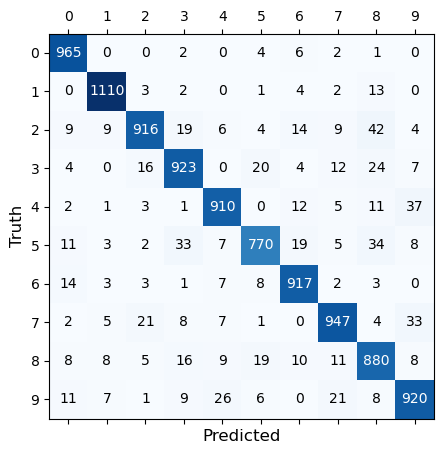

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.matshow(cm, cmap = 'Blues')

ax.set_xticks(np.arange(0, 10, 1))

ax.set_yticks(np.arange(0, 10, 1))

ax.set_xlabel('Predicted', fontsize = 12)
ax.set_ylabel('Truth', fontsize = 12)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        text = ax.text(j, i, f'{cm[i, j]}', ha='center', va='center', color=color)
        
plt.show()

In [13]:
# Creating the neural network having an input layer of 784 neurons , middle layer of 100 neurons and an output layer of 10 neurons


model = keras.Sequential([
    keras.Input(shape = (784,)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8751 - loss: 0.4508
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9638 - loss: 0.1276
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9745 - loss: 0.0859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9804 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9852 - loss: 0.0497


In [15]:
# Flattening of X in the network itself, no need to flatten seperately

model = keras.Sequential([
    keras.Input(shape = (28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/adam', histogram_freq = 1)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5, callbacks = [callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8688 - loss: 0.4559
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9627 - loss: 0.1282
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9735 - loss: 0.0858
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9806 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9831 - loss: 0.0520


In [17]:
model = keras.Sequential([
    keras.Input(shape = (28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
]) 

callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/SGD', histogram_freq = 1)
# create callback to visualize result on TensorBoard

model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5, callbacks = [callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7063 - loss: 1.0734
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8990 - loss: 0.3592
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9141 - loss: 0.2997
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9244 - loss: 0.2666
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9302 - loss: 0.2462
